In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm as anova
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from ISLP import load_data

0    24.467077
Name: mean, dtype: float64


/var/folders/q0/zv6v2pdn6fl4mgbbgcf62_kc0000gn/T/ipykernel_69724/2792592739.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, mm.params[0]), slope=mm.params[1], color='red', label='Fitted line')


Text(0.5, 1.0, 'Least Square Regression Line')

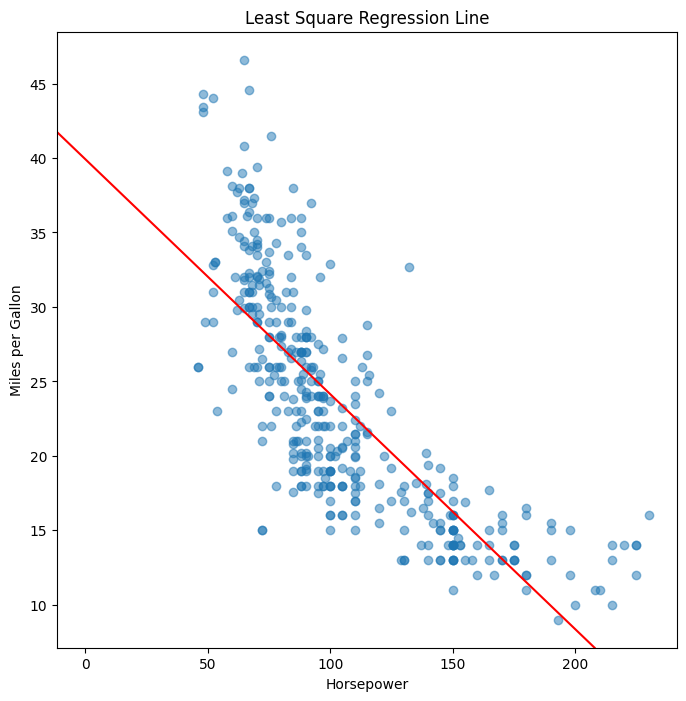

In [ ]:
auto = load_data("Auto")
mm = smf.ols('mpg~ horsepower', data=auto).fit()
print(mm.summary())
A=mm.get_prediction(pd.DataFrame({'horsepower' : [98]})).summary_frame(alpha=0.05)
print(A['mean'])
# problem with plt.subplots(2, 2)
ax = plt.subplots(figsize =(8 ,8))[1]
ax.scatter(auto['horsepower'], auto['mpg'], alpha=0.5)
ax.axline((0, mm.params[0]), slope=mm.params[1], color='red', label='Fitted line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')
ax.set_title('Least Square Regression Line')




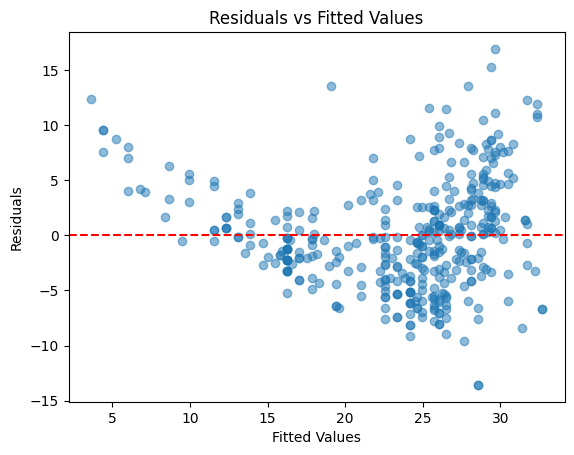

In [ ]:
plt.scatter(mm.fittedvalues, mm.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')
(392,)


array([13, 28])

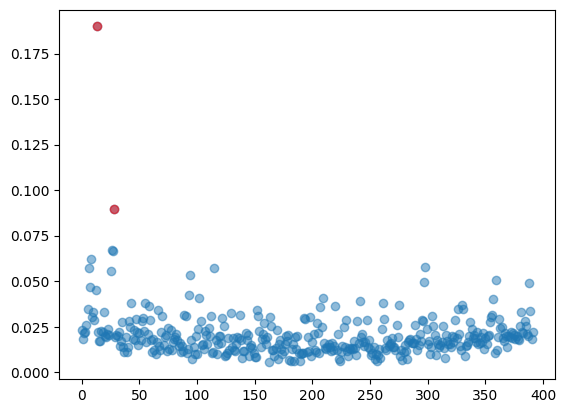

In [501]:
Auto = load_data("Auto")
print(Auto.columns)
Auto.drop(Auto[Auto.values == '?'].index ,inplace=True)
# pd.plotting.scatter_matrix(Auto, alpha=0.5, figsize=(10, 10), diagonal='kde')
# plt.show()
# Auto.corr()
# formula = 'mpg~'+'+'.join(Auto.columns)
# print(formula)
# mm1 = smf.ols(formula+'-mpg', data=Auto).fit()
# print(mm1.summary())
# anova(mm1)

# plt.scatter(mm1.fittedvalues, mm1.resid, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Fitted Values')
# plt.show()

high_leverage_point= mm1.get_influence().hat_matrix_diag
print(high_leverage_point.shape)
plt.scatter(np.arange(Auto.shape[0]), high_leverage_point, alpha=0.5)
x=np.where(high_leverage_point > 0.075)[0]
plt.scatter(x, high_leverage_point[x], color='red', alpha=0.5)
x

In [ ]:
y= Auto['mpg']
x=Auto.drop('mpg', axis=1)
z=np.log(x)
df1 = pd.concat([y,z], axis=1)
df1= pd.DataFrame(df1)
print(type(df1))

c = z.columns
formula = 'mpg~'+'+'.join(c)
print(formula)
mm2 = smf.ols(formula, data=df1).fit()
print(mm2.summary())

y=np.sqrt(x)

mm3 = smf.ols(formula1, data=Auto).fit()
print(mm3.summary())

<class 'pandas.core.frame.DataFrame'>
mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          6.67e-153
Time:                        23:38:02   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------